# Tarea 1

## Pregunta 1

**Assume we implemented an algorithm that has complexity approximately ${nlog(n)}$. How much faster is this implementation compared to one of complexity ${n^2}$?**

un algoritmo con complejidad ${nlog(n)}$ va a tener un crecimiento loglineal, mientras que el algortmo con complejidadad ${n^2}$ va a tener un crecimiento cuadratico.


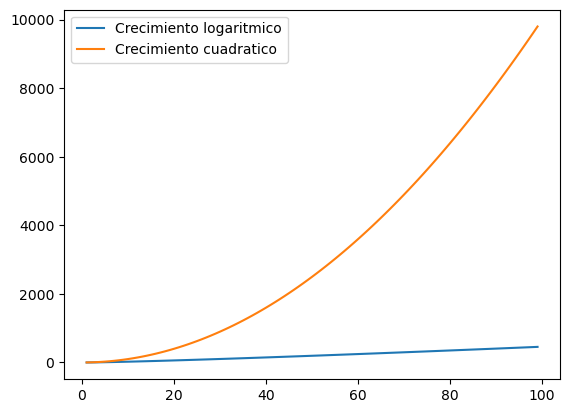

In [34]:
from matplotlib import pyplot
from math import log

def ecuacionLog(x):#ecuacion nlogn
    return x * log(x)

def ecuacionExp(x):#ecuacion cuadratico x^2
    return x**2

#graficar las funciones en el rango de 0 a 100
x = range(1,100)
pyplot.plot(x,[ecuacionLog(i) for i in x],label = "Crecimiento logaritmico")
pyplot.plot(x,[ecuacionExp(i) for i in x],label = "Crecimiento cuadratico")
pyplot.legend()

Como se ve en la grafica, el crecimiento de la funcion ${nlog(n)}$ presenta un crecimiento que al trabajar con numeros muy grandes se puede comparar a la funcion de crecimiento n (que es ideal), mientras que la funcion de crecimiento cuadratico (${n^2}$), con numeros muy altos (Big O), presenta un crecimiento mucho mayor

## Pregunta 2


The runtime of an algorithm is captured in the following table:
As precissely as possible, estimate the function that describes the growth of the runtime

Se grafica la tabla  a continuacion

<AxesSubplot:xlabel='N'>

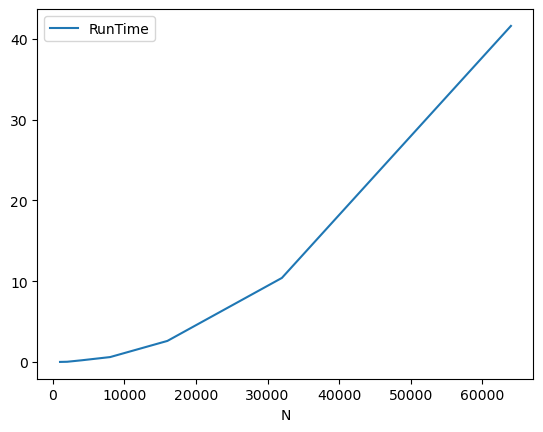

In [96]:
import pandas as pd
N = [1000, 2000,4000,8000,16000,32000,64000]
RunTime =  [0.0,0.02,0.2,0.6,2.6,10.4,41.6]

df = pd.DataFrame(zip(N,RunTime))
df.columns = ['N' , 'RunTime']
df.plot(x='N', y='RunTime')


Al ver la grafica, se puede notar que es similar a la de una funcion cuadratica, por lo que se toma el dato como si fuera una parabola con vertice cero. 
Se usa la ecuacion $${y = a(x-h)^2 + k}$$ donde h y k seran cero (vertice). Se toman los valores de la tabla (32000,10.4) y se reemplaza $${10.4 = a (32000-0)^2+0 -> 10.4 = a(32000)^2 }$$ se despeja para encontrar a y se obtiene que $${a = 1.0156x10^-8}$$ se reemplaza el valor de a en la ecuacion y se obtiene la ecuacion: $${T(n) = 1.0156x10^-8(N)^2}$$

para comprobar se reemplaza N en la ecuacion

In [97]:
for i in N:
    print((1.0156*10**-8)*i**2)

0.010156
0.040624
0.162496
0.649984
2.599936
10.399744
41.598976


## Ejercicio 3

By estimating the number of operations as a function of n, estimate the complexity of the following function

In [2]:
def func1(n):            
    A = range(0,n)
    sum = 0
    i = 0
    for x in A[i:]:
        i += 1
        for j in range(i, len(A)):
            y = A[j]
            k = j
            while k < len(A):
                z = A[k]
                k = 2*k
                if x + y <= z:
                    sum += 1
    return sum

```
def func1(n):                           |  Cost  |   Times              
    A = range(0,n)                      |   C1   |     1
    sum = 0                             |   C2   |     1
    i = 0                               |   C3   |     1
    for x in A[i:]:                     |   C4   |     n
        i += 1                          |   C5   |     n
        for j in range(i, len(A)):      |   C6   |     n^2
            y = A[j]                    |   C7   |     n^2
            k = j                       |   C8   |     n^2
            while k < len(A):           |   C9   |     Sumatoria (j=0 a n) t
                z = A[k]                |   C10  |     Sumatoria (j=0 a n) t-1
                k = 2*k                 |   C11  |     Sumatoria (j=0 a n) t-1    
                if x + y <= z:          |   C12  |     Sumatoria (j=0 a n) t-1    
                    sum += 1            |   C13  |     Sumatoria (j=0 a n) t-1
    return sum                          |   C14  |     1
```

se tiene la ecuacion: $${T(n) = C1+C2+C3+C14+(C4+C5)n+(C6+C7+C8)n^2+C9sum_{j=0}^n (t_j) + (C10+C11+C12+C13)sum_{j=0}^n (t_j -1) }$$


### Mejor Caso
El mejor caso se da cuando n = 0. El primer lazo, al x tomar valores entre (0,0) no se ejecutaria con ningun valor, por lo que solo se tomaria el valor de c1,c2 y c3 dando:  $${T(n) = C1 + C2 + C3}$$ por lo que si ${n = 0}$ la complejidad no dependera de n.
### Peor caso
En el peor caso, n es un numero extremadamente alto, por lo que el lazo while se considera como un for al considerar la complejidad, por lo que  se tiene: $${T(n)= C1+C2+C3+C14+(C4+C5)n+(C6+C7+C8)n^2 + (C9+C10+C11+C12+C13)n^3}$$.

### RunTime
$${C1 + C2 + C3 <= T(n) <= C1+C2+C3+C14+(C4+C5)n+(C6+C7+C8)n^2 + (C9+C10+C11+C12+C13)n^3}$$ 
### Simplificar 
$${C1 + C2 + C3 <= T(n) <= (C9+C10+C11+C12+C13)n^3}$$ 
Al n^3 ser tan grande, se vuelve predominante

## Ejercicio 4

 From class, remember the code we use to get the sum of the first ${n}$ positive integers:
``` python
 def sum1(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total
```
Now consider a different function that does the same thing.
``` python
def sum2(n): 
    total = n*(n+1)//2
return total
```
### 1. Run the two functions and make sure that they return the same outputs. Use n = 5,8,103,527

In [4]:
def sum1(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total
def sum2(n): 
    total = n*(n+1)//2
    return total
valoresN = [5,8,103,527]
for n in valoresN:
    print("El valor se sum1 es: ", sum1(n))
    print("El valor se sum2 es: ", sum2(n))

El valor se sum1 es:  15
El valor se sum2 es:  15
El valor se sum1 es:  36
El valor se sum2 es:  36
El valor se sum1 es:  5356
El valor se sum2 es:  5356
El valor se sum1 es:  139128
El valor se sum2 es:  139128


### 2. Use Python time library to estimate the runtime for inputs of ${n = 1,10,10^2,10^3,10^4,10^5,10^6,10^7,10^8,10^9}$

In [13]:
import time
from time import sleep

listaSum = []
listaSum1 = []
listaSum2 = []

#funcion decoradora para medir el runtime
def DecoratorRunTime(func):
    # funcion para mostrar el runtime de la funcion
    def wrap_func(*args, **kwargs):
        t1 = time.time_ns()
        result = func(*args, **kwargs)
        t2 = time.time_ns()
        runtime = (float(t2-1*10**-9)-float(t1-1*10**-9))
        listaSum.append(runtime) #los valores se guardan en listaSum
        print(f'Runtime de la funcion es: {runtime} nanosegundos')
        return result
    return wrap_func
#El  tiempo se presenta en nanosegundos
@DecoratorRunTime
def sum1(n):
    sleep(1)
    total = 0
    for i in range(1, n+1):
        total += i
    return total

@DecoratorRunTime
def sum2(n): 
    sleep(1)
    total = n*(n+1)//2
    return total

valores_n_ej2 = [1,10,10**2,10**3,10**4,10**5,10**6,10**7,10**8,10**9]

#probar runtime con los valores indicadas
for m in valores_n_ej2:
    print("El valor se sum1 para ",m," es:", sum1(m))
    print("El valor se sum2 para ",m," es:", sum2(m),"\n")

#agregar los datos de cada runtime a su respectiva lista
for a in range(0,len(listaSum)):
    if a%2 ==0:
        listaSum2.append(listaSum[a-1])
    else:
        listaSum1.append(listaSum[a-1])

Runtime de la funcion es: 1012604928.0 nanosegundos
El valor se sum1 para  1  es: 1
Runtime de la funcion es: 1013257216.0 nanosegundos
El valor se sum2 para  1  es: 1 

Runtime de la funcion es: 1010161664.0 nanosegundos
El valor se sum1 para  10  es: 55
Runtime de la funcion es: 1000429824.0 nanosegundos
El valor se sum2 para  10  es: 55 

Runtime de la funcion es: 1000810240.0 nanosegundos
El valor se sum1 para  100  es: 5050
Runtime de la funcion es: 1012706560.0 nanosegundos
El valor se sum2 para  100  es: 5050 

Runtime de la funcion es: 1012101632.0 nanosegundos
El valor se sum1 para  1000  es: 500500
Runtime de la funcion es: 1012273152.0 nanosegundos
El valor se sum2 para  1000  es: 500500 

Runtime de la funcion es: 1010990336.0 nanosegundos
El valor se sum1 para  10000  es: 50005000
Runtime de la funcion es: 1009091584.0 nanosegundos
El valor se sum2 para  10000  es: 50005000 

Runtime de la funcion es: 1017525504.0 nanosegundos
El valor se sum1 para  100000  es: 5000050000


### 3. Plot the runtime as a function of ${n}$ for both functions in the same figure.
    - Use different line colors and markers to help distinguish between the two curves.

,T1(n),T2(n)
0,1.012605e+09,1.013934e+09
1,1.010162e+09,1.013257e+09
2,1.000810e+09,1.000430e+09
3,1.012102e+09,1.012707e+09
4,1.010990e+09,1.012273e+09
5,1.017526e+09,1.009092e+09
6,1.040928e+09,1.004212e+09
7,1.326232e+09,1.001240e+09
8,4.182666e+09,1.009586e+09
9,3.254533e+10,1.015318e+09


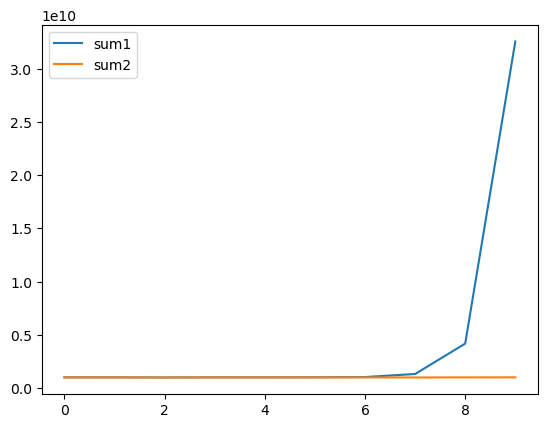

In [14]:
from matplotlib import pyplot
import pandas as pd

#graficar las dos listas
pyplot.plot(listaSum1,label = "sum1")
pyplot.plot(listaSum2,label = "sum2")
pyplot.legend()#colocar la leyenda

#graficar tabla de datos
tabladatos = pd.DataFrame(zip(listaSum1, listaSum2))
tabladatos.columns = ['T1(n)', 'T2(n)']
tabladatos

##los tiempos  en la tabla se presentan en  nanosegundos

### 4. Analytically estime the runtime functions for the functions sum1 and sum2. Call them $T_{1} (n)$ and $T_{2} (n)$

Para sum1:
```
def sum1(n):
    total = 0                           1 read
    for i in range(1, n+1):             1 read, 1 write  dentro de loop
        total += i                      1 write          dentro de loop
    return total                        1 write
```
al tener 3 operaciones dentro del for se tiene:
$$T_{1} (n) = 3n+2$$. Al trabajar con numeros muy altos, se considera solamente el $$T_{1} (n) = 3n $$
Para sum2:

```
def sum2(n): 
    total = n*(n+1)//2                 2 read
    return total                       1 write
```
dando un tiempo de $$T_{2} (n) = 3$$

### 5. How long will it take to run the code for $n = 10^{100}$ using sum1 and sum2? What are your main impressions about the difference?

Usando las formulas obtenidas anteriormente de $T_{1} (n)$ y $T_{2} (n)$ se obtiene que: $$T_{1} (n) = 3n -> 3*10^{100} -> 3x10^{101}$$ Y para $$ T_{2} (n) = 3 -> 3 $$ ya que  el tiempo de T(2) no depende de n


## Ejercicio 5

### 5. Prove that the running time of an algorithm is $Theta(g(n))$ if and only if its worst-case running time is $O(g(n))$ and its best-case running time is $Omega(g(n))$

El tiempo de ejecucion theta es determina el mejor (Omega) y el peor (O) caso.
Se sabe que $Theta(g(n))$ es $$Omega(g(n)) <= T(n) <= O(g(n))$$
Para Theta,$$0 <= C1g(n) <= T(n)$$ donde theta es el limite inferior de T(n)
Para $O(g(n))$, $$T(n) <= C2g(n) $$ donde O es el limite superior de T(n)
Por lo tanto, se tiene que $$C1g(n) <= T(n) <= C2g(n) $$

## Ejercicio 6

### Sort the following functions in decreasing order of asymptotic complexity (O(f(n))):
- $f_1{(n)} = \sqrt{n}$
- $f_2{(n)} = n^3$
- $f_3(n) = {n\\ 4}$
- $f_4(n) = sum_{i=2}^n (i-1)$


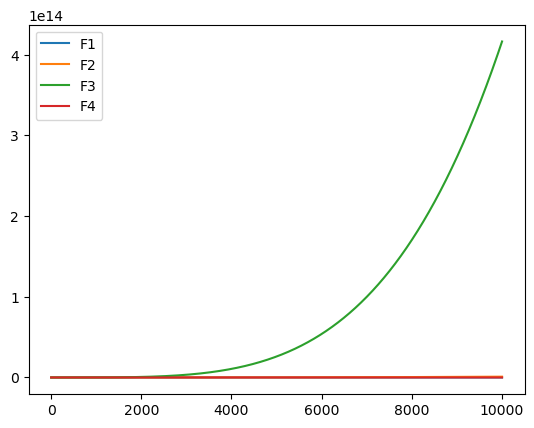

In [121]:
import math
def f1(n):
    return math.sqrt(n)
def f2(n):
    return n**3
def f3(n):
    if(n>4):
        return math.factorial(n) // (math.factorial(4) * math.factorial(n - 4))
def f4(n):
    suma = 0
    for i  in range  (2,n+1):
        suma += i-1
    return suma
x = range(1,10000)
pyplot.plot(x,[f1(i) for i in x],label = "F1")
pyplot.plot(x,[f2(i) for i in x],label = "F2")
pyplot.plot(x,[f3(i) for i in x],label = "F3")
pyplot.plot(x,[f4(i) for i in x],label = "F4")
pyplot.legend()

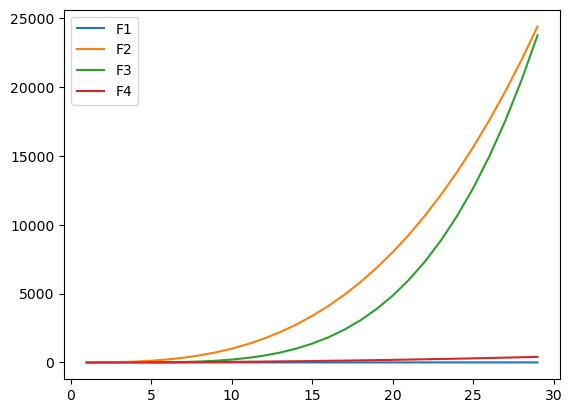

In [120]:
x = range(1,30)
pyplot.plot(x,[f1(i) for i in x],label = "F1")
pyplot.plot(x,[f2(i) for i in x],label = "F2")
pyplot.plot(x,[f3(i) for i in x],label = "F3")
pyplot.plot(x,[f4(i) for i in x],label = "F4")
pyplot.legend()

Se puede analizar mediante las graficas presentadas, donde para valores pequeños (grafica 2) F3 es la funcion de mayor crecimiento, seguido por f2, seguido por f4 y finalizando en f1. Para valores considerablemente mas grandes, f3 presenta un crecimiento mucho mayor al resto, y mediante lo obtenido en la grafica anterior se puede definir que este es seguido por f2, el cual es seguido por f4 y f1 siendo el valor de menor crecimiento, por lo tanto, en orden decreciente
* f3
* f2
* f4
* f1

## Ejercicio 7

### Implement the methods of the class Array that deal with deletion of elements. Consider the 3 cases we considered in class.

Se agregan las funciones requeridas para que poder crear un arreglo, presentarlo y probar las funciones

In [23]:
import ctypes

class Array(object):
    """
    Implementation of the array data structure
    """     
    def __init__(self, n, values=None):
        self.l = 0
        self.n = n
        self.array = self._create_array(self.n)
        if values:
            self.initialize_array(values)
    def _create_array(self, n):
        """
        Creates a new array of capacity n
        """
        return (n * ctypes.py_object)()

    def __getitem__(self, item_index):
        """
        Return element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        try:
            x = self.array[item_index]
        except ValueError:
            x = None
        return x
    
      
    def initialize_array(self, values):
        """
        Initialize array
        """
        if self.n != len(values):
            raise ValueError("element count different than capacity")
        for item in values:
            self.array[self.l] = item
            self.l += 1
            
    def list_array(self):
        """
        List elements of the array
        using list comprehension
        """
        return ", ".join(str(x) if x is not None else '_' for x in self)

##### Funcion para borrar al Final

In [24]:
class Array(Array):
    def deleteLast(self):
            if(self.l>1):#si hay mas de un elemento, se borra el ultimo
                self.array[self.l-1] = ctypes.py_object
                self.l -= 1
            else:
                print("solo queda un elemento en la lista")

##### Funcion para borrar al inicio

In [30]:
class Array(Array):
        def deleteFirst(self):
        
            """
            Eliminar el primer elemento del arreglo
            """
            if(self.l>1):#revisar que haya mas de un elemento en el arreglo
                for i in range (self.l-1):
                    self.array[i] = self.array[i+1]
                self.deleteLast()

            else:
                print("Solo queda un valor en la lista")

##### Funcion para borrar con indices

In [32]:
class Array(Array):
        def deleteIndex(self,index):
            if(index==0):
                self.deleteFirst()
            elif(index==(self.l-1)):
                self.deleteLast()
            elif(index>=0 and index < self.l):
                for i in range(index,self.l-1):
                    self.array[i] = self.array[i+1]
                self.deleteLast()
            elif(index < 0 or index>=self.l):
                print("Indice fuera de limites")

###### Probar las funciones

In [33]:
x = Array(10, [1,-2,3,4,5,-6,70,82,93,100])
print("Lista inicial",x.list_array())

x.deleteFirst()
print("Lista con el primero eliminado: ",x.list_array())
x.deleteLast()
print("Lista con el ultimo eliminado: ",x.list_array())   
x.deleteIndex(2)
print("Lista con indice eliminando: ", x.list_array())

Lista inicial 1, -2, 3, 4, 5, -6, 70, 82, 93, 100
Lista con el primero eliminado:  -2, 3, 4, 5, -6, 70, 82, 93, 100, <class 'ctypes.py_object'>
Lista con el ultimo eliminado:  -2, 3, 4, 5, -6, 70, 82, 93, <class 'ctypes.py_object'>, <class 'ctypes.py_object'>
Lista con indice eliminando:  -2, 3, 5, -6, 70, 82, 93, <class 'ctypes.py_object'>, <class 'ctypes.py_object'>, <class 'ctypes.py_object'>
